In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


# Analyse préliminaire

In [2]:
data = pd.read_excel(r"erp.xlsx")

C:\Users\Simplon 1\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
data = data.dropna()
print(data.head(100))
data.describe()
#pas de données manquante


    product_id  onsale_web  price  stock_quantity stock_status
0         3847           1   24.2               0   outofstock
1         3849           1   34.3               0   outofstock
2         3850           1   20.8               0   outofstock
3         4032           1   14.1               0   outofstock
4         4039           1   46.0               0   outofstock
..         ...         ...    ...             ...          ...
95        4166           1   20.5               8      instock
96        4167           1   14.3              36      instock
97        4168           1   18.2              50      instock
98        4170           1    9.0              58      instock
99        4171           1    7.8              65      instock

[100 rows x 5 columns]


,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [4]:
data = pd.read_excel(r"web.xlsx")

C:\Users\Simplon 1\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
print(data.head(100))
data.describe()
#plusieurs colonnes vides à enlever
#vérifie si dropna risque de perdre des données utiles
data = data.drop(columns=['tax_class','post_content_filtered','post_mime_type'])
print("_________________________________________________________________")
print(data)
null_data = data[data.isnull().any(axis=1)]
data[null_data == True] 
#la majorité des lgines avec valeurs manquantes semlent inutiles


                    sku  virtual  downloadable  rating_count  average_rating  \
0   bon-cadeau-25-euros        0             0             0             0.0   
1                 15298        0             0             0             0.0   
2                 15296        0             0             0             0.0   
3                 15300        0             0             0             0.0   
4                 19814        0             0             0             0.0   
..                  ...      ...           ...           ...             ...   
95                15784        0             0             0             0.0   
96                15786        0             0             0             0.0   
97                14332        0             0             0             0.0   
98                16210        0             0             0             0.0   
99                16211        0             0             0             0.0   

    total_sales tax_status  tax_class  

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


In [6]:
data = data.dropna()
print(data.head(10))
data.describe(include = "all")
#dropna ne renvoit rien car certaines colonens sont vides


Empty DataFrame
Columns: [sku, virtual, downloadable, rating_count, average_rating, total_sales, tax_status, post_author, post_date, post_date_gmt, post_content, post_title, post_excerpt, post_status, comment_status, ping_status, post_password, post_name, post_modified, post_modified_gmt, post_parent, guid, menu_order, post_type, comment_count]
Index: []

[0 rows x 25 columns]


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
count,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,...,0,0.0,0,0,0,0.0,0,0.0,0,0.0
unique,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,...,0,NaN,0,0,0,NaN,0,NaN,0,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Lecture des fichiers excel,analyse,nettoyage des données empêchant le merge

In [7]:
erp = pd.read_excel(r"erp.xlsx")

web = pd.read_excel(r"web.xlsx")
web = web.drop(columns=['tax_class','post_content_filtered','post_mime_type','post_password','post_content'])
print(len(web))
web = web.dropna()
print(len(web))
print(web)
print(web.isnull().sum(axis = 0)) #vérifie si des colonnes pleines de valeurs nulle existent
#print(pd.read_sql_query("SELECT sku, COUNT(*) c FROM web GROUP BY sku HAVING c > 1",conn))

liaison = pd.read_excel(r"liaison.xlsx")
liaison = liaison.dropna()
#print(pd.read_sql_query("SELECT id_web, COUNT(*) c FROM liaison GROUP BY product_id HAVING c > 1",conn))

C:\Users\Simplon 1\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


1513
714
                     sku  virtual  downloadable  rating_count  average_rating  \
0    bon-cadeau-25-euros        0             0             0             0.0   
1                  15298        0             0             0             0.0   
2                  15296        0             0             0             0.0   
3                  15300        0             0             0             0.0   
4                  19814        0             0             0             0.0   
..                   ...      ...           ...           ...             ...   
762                16135        0             0             0             0.0   
767                15891        0             0             0             0.0   
768                15887        0             0             0             0.0   
797              13127-1        0             0             0             0.0   
798                16230        0             0             0             0.0   

     total_sales t

C:\Users\Simplon 1\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Merging des tables

In [8]:

data = pd.merge(pd.merge(liaison, web, left_on="id_web",right_on = "sku"),erp,on = "product_id")
print(data)

     product_id   id_web      sku  virtual  downloadable  rating_count  \
0          3847    15298    15298        0             0             0   
1          3849    15296    15296        0             0             0   
2          3850    15300    15300        0             0             0   
3          4032    19814    19814        0             0             0   
4          4039    19815    19815        0             0             0   
..          ...      ...      ...      ...           ...           ...   
709        6930    16135    16135        0             0             0   
710        7023    15891    15891        0             0             0   
711        7025    15887    15887        0             0             0   
712        7247  13127-1  13127-1        0             0             0   
713        7338    16230    16230        0             0             0   

     average_rating  total_sales tax_status  post_author  ...  \
0               0.0          6.0    taxable   

# Vérifications intégrité données

In [37]:

#détection des product_id doublon
doub = data["sku"].duplicated()
i = 0
for e in doub:
    if e == True:
        i =+ 1
print("Nb doublon sku: " + str(i))
# pas de doublon

doub = data["product_id"].duplicated()
i = 0
for e in doub:
    if e == True:
        i =+ 1
print("Nb doublon product_id: " + str(i))


doub = data["product_id"]
i = 0
for e in doub:
    if e is None:
        i =+ 1
print("Nb null product_id: " + str(i))

doub = data["sku"]
i = 0
for e in doub:
    if e is None:
        i =+ 1
print("Nb null sku: " + str(i))
#aps de doublosn ou de realtion vide

Nb doublon sku: 0
Nb doublon product_id: 0
Nb null product_id: 0
Nb null sku: 0


# Nettoyage table de merge

In [38]:
#verification nombre valeurs uniques par colonnes
print(data.shape)
nom,nbUnique = [],[]
for name,column in data.iteritems():
    print(name +": "+ str(len(column.unique().tolist())))
    nom.append(name)
    nbUnique.append(len(column.unique().tolist()))
    if len(column.unique().tolist()) < 2: 
        data = data.drop(columns = name )
        print("Colonne " + name + " droppée.")
uniques = pd.DataFrame()
uniques['nom'] = nom
uniques['nbUnique'] = nbUnique


print(data.shape)

(714, 16)
product_id: 714
id_web: 714
sku: 714
total_sales: 41
post_author: 2
post_date: 714
post_date_gmt: 714
post_title: 711
post_excerpt: 677
post_name: 714
post_modified: 587
post_modified_gmt: 587
guid: 714
price: 362
stock_quantity: 126
stock_status: 2
(714, 16)


In [39]:
data = data[["post_title","total_sales","price"]]

# Calcul du chiffre d'affaire

In [40]:
data["chiffreAffaire"] = data["price"] * data["total_sales"]
print(data["chiffreAffaire"])

0      145.2
1        0.0
2        0.0
3       42.3
4        0.0
       ...  
709     42.0
710      0.0
711      0.0
712      0.0
713      0.0
Name: chiffreAffaire, Length: 714, dtype: float64


<ipython-input-40-375649cd798d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["chiffreAffaire"] = data["price"] * data["total_sales"]


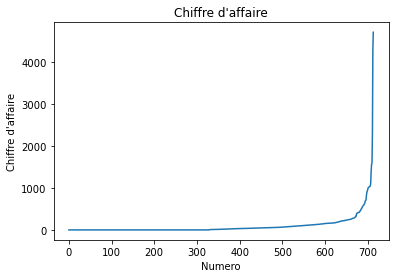

In [41]:
plt.plot(data.index,sorted(data["chiffreAffaire"]))
plt.title("Chiffre d'affaire")
plt.xlabel("Numero")
plt.ylabel("Chiffre d\'affaire")
plt.show()

In [42]:
ecart_type = statistics.stdev(data['price'])
ecart_quartile = (np.percentile(data.price, 75) - np.percentile(data.price, 25))
moyenne = data["price"].mean()
print("Ecart-type de prix: " + str(ecart_type))
print("Ecart intercartile de prix: " + str(ecart_quartile))
print("Moyenne de prix: " + str(moyenne))


Ecart-type de prix: 27.810524922323705
Ecart intercartile de prix: 28.075000000000003
Moyenne de prix: 32.49313725490197


# Isolation des outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6df4d38b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6df4d3f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6df4d3550>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6df4e0670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6df4e09d0>],
 'means': []}

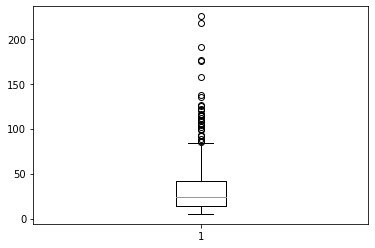

In [43]:
plt.boxplot(data['price'])

In [44]:
print("Outliers price écart-type: ")
print(data[["price","post_title"]].loc[data['price'] > (moyenne+(ecart_type*2))])
print("Nombre outlier: " + str(len(data[["price","post_title"]].loc[data['price'] > (moyenne+(ecart_type*2))])))
print(data[["price","post_title"]].loc[data['price'] < (moyenne-(ecart_type*2))])

print("Outliers price écart interquartile: ")
print(data[["price","post_title"]].loc[data['price'] > (np.percentile(data.price, 75)+ecart_quartile*1.5)])
print(data[["price","post_title"]].loc[data['price'] < (np.percentile(data.price, 25)-ecart_quartile*1.5)])

Outliers price écart-type: 
     price                                         post_title
63   100.0  Zind-Humbrecht Riesling Grand Cru Rangen De Th...
65    88.4  Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
199  225.0     Champagne Egly-Ouriet Grand Cru Millésimé 2008
201  126.5     Champagne Egly-Ouriet Grand Cru Blanc de Noirs
218  176.0                               Cognac Frapin VIP XO
219  108.5              Cognac Frapin Château de Fontpinot XO
221  157.0  Cognac Frapin Château de Fontpinot 1989 20 Ans...
222  104.0                          Cognac Frapin Cigar Blend
227  109.6  Château de Meursault Puligny-Montrachet 1er Cr...
380  102.3  Domaine Des Croix Corton Grand Cru Les Grèves ...
381  137.0  Domaine Des Croix Corton Charlemagne Grand Cru...
426  217.5     David Duband Charmes-Chambertin Grand Cru 2014
431  105.0  Domaine des Comtes Lafon Volnay 1er Cru Santen...
432  105.0  Domaine des Comtes Lafon Volnay 1er Cru Santen...
437  112.0  Champagne Agrapart &amp; Fils 

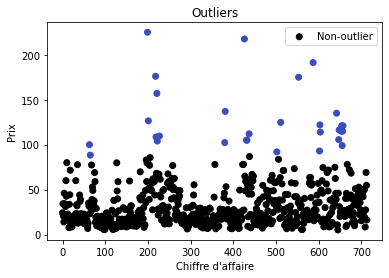

In [45]:
data[["price","post_title"]].loc[data['price'] > (moyenne+(ecart_type*2))]
colors = list(map(lambda x: '#3b4cc0' if x > (moyenne+(ecart_type*2)) else '#000000', data["price"]))
plt.scatter(range(len(data)),data["price"], c = colors, marker="o", picker=True,label = "Non-outlier")
plt.legend()
plt.title('Outliers')
plt.xlabel('Chiffre d\'affaire')
plt.ylabel('Prix')
plt.show()

Il n'y a pas d'outliers bas, on peut donc les ignorer

Si besoin, on pourrait nettoyer les outliers avec le code suivant

In [31]:
#nettoyage outlier avec les 2 méthodes
#data = data[["price","post_title"]].loc[data['price'] > (np.percentile(data.price, 75)+ecart_quartile*1.5)]
#data = data[["price","post_title","chiffreAffaire"]].loc[data['price'] < (moyenne+(ecart_type*2))]
#print(data)


     price                                         post_title  chiffreAffaire
0     24.2        Pierre Jean Villa Saint-Joseph Préface 2018           145.2
1     34.3    Pierre Jean Villa Saint-Joseph Rouge Tildé 2017             0.0
2     20.8  Pierre Jean Villa Crozes-Hermitage Accroche Co...             0.0
3     14.1  Pierre Jean Villa IGP Collines Rhodaniennes Ga...            42.3
4     46.0          Pierre Jean Villa Côte Rôtie Carmina 2017             0.0
..     ...                                                ...             ...
709    8.4   Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015            42.0
710   27.5         Camin Larredya Jurançon Sec La Virada 2018             0.0
711   69.0     Domaine Jamet Côte Rôtie Fructus Voluptas 2018             0.0
712   54.8       Clos du Mont-Olivet Châteauneuf-du-Pape 2007             0.0
713   16.3  Domaine Saint-Nicolas Vin de France Blanc Les ...             0.0

[684 rows x 3 columns]


# Clustering

Création d'une liste à partir de data

0.15234233248789597
[[145.2  24.2]
 [  0.   34.3]
 [  0.   20.8]
 ...
 [  0.   69. ]
 [  0.   54.8]
 [  0.   16.3]]


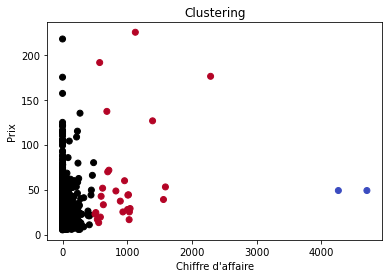

Score de silouhette: 0.8720874507492442


In [46]:
#conversion en lsite de data pour pouvoir utiliser kmean.predict
listeData = np.array(data[["chiffreAffaire","price"]])

print(data["chiffreAffaire"].corr(data["price"]))
print(listeData)


num_classes = 3
# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=num_classes, n_init=10)
kmeans.fit(listeData)
#print(kmeans.labels_)

# Predict the cluster for all the samples
P = kmeans.predict(listeData)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else('#b40426' if x == 2 else '#000000'), P))
plt.scatter(listeData[:,0], listeData[:,1], c=colors, marker="o", picker=True)
plt.title('Clustering')
plt.xlabel('Chiffre d\'affaire')
plt.ylabel('Prix')
plt.show()
#les clusters obtenus ont un bon score de silouhette et le second cluster représente des outliers
print("Score de silouhette: "+str(silhouette_score(listeData,P)))

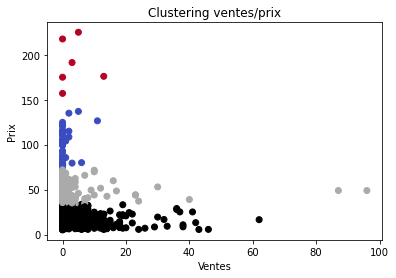

Score de silouhette: 0.5728046840570491


In [57]:
#conversion en lsite de data pour pouvoir utiliser kmeans.predict
listeData = np.array(data[["total_sales","price"]])




num_classes = 4
# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=num_classes, n_init=10)
kmeans.fit(listeData)
#print(kmeans.labels_)

# Predict the cluster for all the samples
P = kmeans.predict(listeData)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else('#aaaaaa' if x == 2 else('#b40426' if x == 3 else '#000000')), P))
plt.scatter(listeData[:,0], listeData[:,1], c=colors, marker="o", picker=True)
plt.title('Clustering ventes/prix')
plt.xlabel('Ventes')
plt.ylabel('Prix')
plt.show()
#les clusters obtenus ont un bon score de silouhette et le second cluster représente des outliers
print("Score de silouhette: "+str(silhouette_score(listeData,P)))

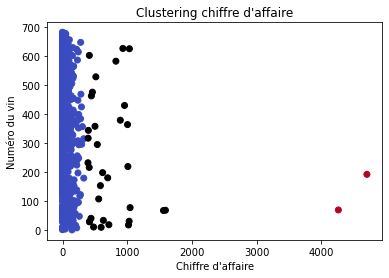

Score de silhouette: 0.8539917035031385


In [40]:
num_classes = 3

# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=num_classes, n_init=10)


dataList = np.array(data['chiffreAffaire']).reshape(-1, 1)

kmeans.fit(dataList)
# Predict the cluster for all the samples
P = kmeans.predict(dataList)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else('#b40426' if x == 2 else '#000000'), P))
plt.scatter(dataList,range(len(dataList)), c=colors, marker="o", picker=True)
plt.title("Clustering chiffre d\'affaire")
plt.xlabel("Chiffre d\'affaire")
plt.ylabel("Numéro du vin")
plt.show()
print("Score de silhouette: " + str(silhouette_score(listeData,P)))

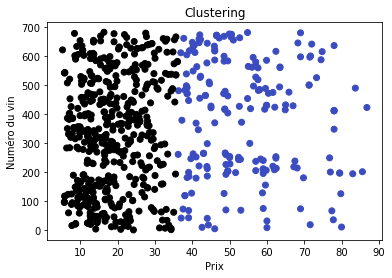

Scorde de silhouette: 0.2557140308338844


In [46]:
num_classes = 2


# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=num_classes, n_init=10)


dataList = np.array(data['price']).reshape(-1, 1)

kmeans.fit(dataList)
# Predict the cluster for all the samples
P = kmeans.predict(dataList)
s
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else('#b40426' if x == 2 else '#000000'), P))
plt.scatter(dataList,range(len(dataList)), c=colors, marker="o", picker=True)
plt.title('Clustering')
plt.xlabel('Prix')
plt.ylabel('Numéro du vin')
plt.show()
print("Scorde de silhouette: " + str(silhouette_score(listeData,P)))
#score faible mais meilleur que avec 3 classes

# Conclusion

Les outliers détectés sont sans doute des fin de haute qualité, ce qui explqiue leur prix. En effet, aucun vin à haut prix
n'a connu beaucoup de ventes.

